In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


<b>안녕하세요.</b> <br>
반갑습니다.

In [ ]:
# 임의의 가상 시계열 데이터 생성

data = np.random.randn(100).cumsum()
# np.random.randn(100) : 표준 정규 분포(평균 0, 표준 편차 1)에서 무작위로 샘플링한 100개의 숫자 생성
# cumsum(): 랜덤 숫자들의 누적 합 계산.. 랜덤 워크(random walk) 생성
      # 랜덤 워크(random walk): 무작위로 발생하는 이벤트들의 결과를 순차적으로 나열한 것
      # 다음 단계가 전 단계의 결과에 의존하지 않고 무작위로 결정되는 과정 ex) 술취한 사람의 다음 걸음 걸이... 예측 불가능
   # 랜덤한 변화량들을 차례로 누적해 감으로써, 시간이 지남에 따라 어떻게 값이 변화하는지를 보여주는 누적 경로 생성

# data

In [ ]:
np.random.seed(123)
print(np.random.randn(3)).cumsum()



[-1.0856306   0.99734545  0.2829785 ]
[-1.50629471 -0.57860025  1.65143654]


In [ ]:
# Pandas 시리즈로 변환
time_series = pd.Series(data, index=pd.date_range(start='20200101', periods=100))

# pd.Series()를 사용하여 NumPy 배열을 Pandas 시리즈로 변환
# 인덱스로 날짜 범위를 지정,  시계열 데이터로 생성
# 'start'와 'end'는 예측할 시계열의 시작과 끝 인덱스 지정
# Pandas ... 날짜 및 시간 인덱스를 가진 데이터에 대해 다양한 시간 기반의 기능을 제공

In [ ]:
# ARIMA 모델을 데이터에 적합
# 데이터의 과거 값, 차분을 통한 추세 변화, 그리고 예측 오차의 패턴을 모두 고려하여 미래 값을 예측
# 모델 파라미터 (p=1, d=1, q=1)
   # p: 자기 회귀(AR)의 차수, d: 차분(I)의 차수, q: 이동 평균(MA)의 차수
model = ARIMA(time_series, order=(1, 1, 1))

model_fit = model.fit()


# AR(p) - 자기회귀(AutoRegressive):  이전 관측값의 영향을 나타냄,
   # 'p' = 과거 관측값의 수, p=1 -> 하나의 과거 관측값을 사용.
   # 현재 값이 바로 이전 값에 어느 정도 의존하는지에 대한 모델링 설정

# I(d) - 차분(Integrated): 데이터의 비정상성을 제거하기 위해 필요한 차분의 횟수
   # 'd'는 차분의 차수, d=1 -> 데이터를 한 번 차분(주어진 시계열의 변화분을 구하는 과정)
   #  과정은 데이터에서 추세를 제거하여 시계열이 정상성을 가지도록 돕습니다.

# MA(q) - 이동평균(Moving Average): 예측 오차의 이동평균
   # 'q' 과거 예측 오차의 수 q=1은 하나의 과거 예측 오차를 사용
   # 현재의 예측값이 이전의 예측 오차에 어느 정도 영향을 받는지에 대한 모델링 설정



In [ ]:
# 다음 10 기간에 대한 데이터를 예측
forecast = model_fit.forecast(steps=10)

print(forecast)

2020-04-10    2.595974
2020-04-11    2.683842
2020-04-12    2.616665
2020-04-13    2.668023
2020-04-14    2.628759
2020-04-15    2.658777
2020-04-16    2.635828
2020-04-17    2.653373
2020-04-18    2.639960
2020-04-19    2.650214
Freq: D, Name: predicted_mean, dtype: float64


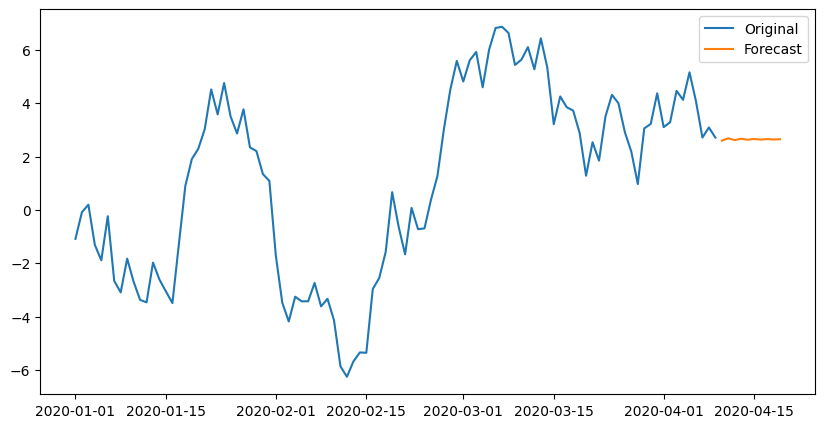

In [ ]:
# 원본 데이터와 예측 결과를 함께 그래프로 표시
plt.figure(figsize=(10,5))
plt.plot(time_series, label='Original')
plt.plot(pd.date_range(start='20200410', periods=10, freq='D'), forecast, label='Forecast')
plt.legend()
plt.show()